# **1. Title & Problem Statement** **bold text**

The goal of this project is to develop a machine learning model that can accurately detect fraudulent credit card transactions using historical data. By analyzing transaction patterns, the model should be able to distinguish between normal and fraudulent activity, helping financial institutions flag suspicious behavior early and reduce potential risks.

Challenges include:

Handling imbalanced datasets where fraud cases are a small fraction of total transactions.
Ensuring high precision to minimize false positives (flagging a valid transaction as fraud).
Ensuring high recall to detect as many fraud cases as possible.

# **2. About The Dataset**

The dataset contains 284,807 transactions with 31 features including:

• Time: This shows how many seconds have passed since the first transaction in the dataset.

• V1-V28: These are special features created to hide sensitive information about the original data.

• Amount: Transaction amount.

• Class: Target variable (0 for normal transactions, 1 for fraudulent transactions).

Link to Download the Dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

# **3. Importing necessary Libraries**

We begin by importing the necessary Python libraries: numpy, pandas, matplotlib and seaborn for data handling, visualization and model building.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# **4. Loading Dataset**

In [3]:
data = pd.read_csv("/content/creditcard.csv")

Inspecting the first 5 rows of the dataframe

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Checking the number of rows and columns

In [5]:
data.shape

(11959, 31)

More about the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

# **5. Exploratory Data Analysis (EDA)**

The next step is to check the distribution of fraudulent vs. normal transactions.

• We separate the dataset into two groups: fraudulent transactions (Class == 1) and valid transactions (Class == 0).

• It calculates the ratio of fraud cases to valid cases to measure how imbalanced the dataset is.

• It then prints the outlier fraction along with the number of fraud and valid transactions.

• This analysis is crucial in fraud detection, as it reveals how rare fraud cases are and whether techniques like resampling or special evaluation metrics are needed.

In [8]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.004367545775239375
Fraud Cases: 52
Valid Transactions: 11906


Since the dataset is highly imbalanced with only 0.04% fraudulent transactions. we’ll first try to build a model without balancing the dataset. If we don’t get satisfactory results we will explore ways to handle the imbalance.

# **6. Exploring Transaction Amounts**

Let's compare the transaction amounts for fraudulent and normal transactions. This will help us understand if there are any significant differences in the monetary value of fraudulent transactions.

In [10]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,52.000000
mean,97.724808
std,321.188775
min,0.000000
25%,1.000000
50%,1.000000
75%,1.772500
max,1809.680000


In [11]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,11906.000000
mean,62.198127
std,177.379105
min,0.000000
25%,5.292500
50%,15.950000
75%,50.000000
max,7712.430000


# **7. Plotting Correlation Matrix**

We can visualize the correlation between features using a heatmap using correlation matrix. This will give us an understanding of how the different features are correlated and which ones may be more relevant for prediction.

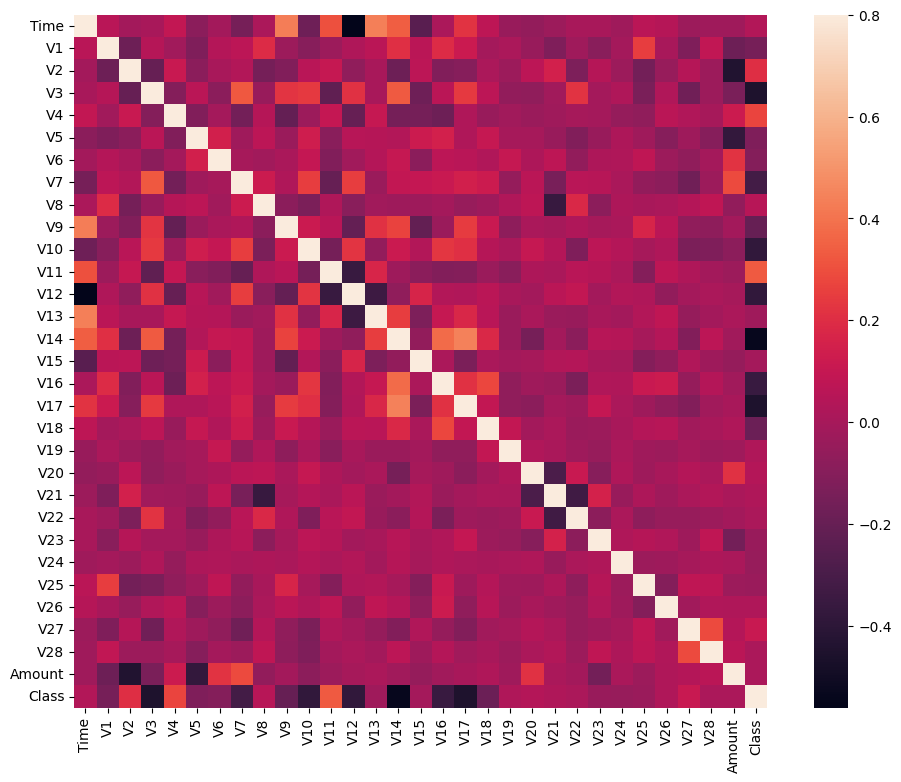

In [12]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Most features do not correlate strongly with others but some features like V2 and V5 have a negative correlation with the Amount feature. This provides valuable insights into how the features are related to the transaction amounts.

# **8. Preparing Data**

Separate the input features (X) and target variable (Y) then split the data into training and testing sets

• x = data.drop(['Class'], axis = 1) removes the target column (Class) from the dataset to keep only the input features.

• y = data["Class"] selects the Class column as the target variable (fraud or not).

• x.shape and y.shape print the number of rows and columns in the feature set and the target set.

• x_data = x.values and y_data = y.values convert the Pandas DataFrame or Series to NumPy arrays for faster processing.

• train_test_split(...) splits the data into training and testing sets into 80% for training, 20% for testing.

• random_state=42 ensures reproducibility (same split every time you run it).

In [22]:
data.dropna(subset=['Class'], inplace=True)

x = data.drop(['Class'], axis = 1)
y = data["Class"]
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size = 0.2, random_state = 42, stratify = y)

(11958, 30)
(11958,)


# **9. Building and Training the Model**

Train a Random Forest Classifier to predict fraudulent transactions.

• from sklearn.ensemble import RandomForestClassifier: This imports the RandomForestClassifier from sklearn.ensemble, which is used to create a random forest model for classification tasks.

• rfc_model = RandomForestClassifier(): Initializes a new instance of the RandomForestClassifier.

• rfc_model.fit(x_train, y_train): Trains the RandomForestClassifier model on the training data (x_train for features and y_train for the target labels).

• y_pred = rfc_model.predict(x_test): Uses the trained model to predict the target labels for the test data (x_test), storing the results in yPred.

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced")

rfc_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

Making the model to predict

In [24]:
y_pred = rfc_model.predict(x_test)

# **8. Evaluating the Model**

After training the model we need to evaluate its performance using various metrics such as accuracy, precision, recall, F1-score and the Matthews correlation coefficient.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score


y_pred = rfc_model.predict(x_test)
y_pred_proba = rfc_model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[2382    0]
 [   3    7]]

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9987    1.0000    0.9994      2382
         1.0     1.0000    0.7000    0.8235        10

    accuracy                         0.9987      2392
   macro avg     0.9994    0.8500    0.9115      2392
weighted avg     0.9987    0.9987    0.9986      2392


ROC-AUC Score: 0.9482


# **9. Model Evaluation Metrics**

The model accuracy is high due to class imbalance so we will have computed precision, recall and f1 score to get a more meaningful understanding. We observe:

• Accuracy: 0.9987: Out of all predictions, 99.87% were correct. However, in imbalanced datasets (like fraud detection), accuracy can be misleading i.e. a model that predicts everything as "not fraud" will still have high accuracy.

• Precision: 0.9987: When the model predicted "fraud", it was correct 99.87% of the time. High precision means very few false alarms (false positives).

• Recall: 0.7000: Out of all actual fraud cases, the model detected 70.00%. This shows how well it catches real frauds. A lower recall means some frauds were missed (false negatives).

• F1-Score: 0.9994: A balance between precision and recall. 99.94% is strong and shows the model handles both catching fraud and avoiding false alarms well.


Note: The Evaluation metrics are slightly differ from actual pipeline to Interactive Python Notebook(ipynb) because in both cases training, test datasets are not same, If you want you can actually import the train, test files into ipynb and run them you will end up with same evalution metrics :)